<a href="https://colab.research.google.com/github/jullyoemmanuel/Servo/blob/main/Aula_0_1_FuncaoTransferencia_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = "red"> Entre com o nome da dupla:##


<font color= "blue"> Jullyo Emmanuel

<font color= "blue"> Pablo Ramon

# **Roteiro 1: Função de Transferência e Modelagem**

# Instalação dos pacotes

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=9a118fdb821631855e13322f6b0273e050b70ba873b2d24c4103a08cd532a373
  Stored in directory: /root/.cache/pip/wheels/a6/3d/b3/8c508e66f4d44cf71b9ec49b94d4a074c8f2ee52475cd8920e
Successfully built control


# Importação das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
import sympy as sp
import scipy 
import math

# Definição dos parâmetros das figuras

In [ ]:
# print no formato float com 3 dígitos
np.set_printoptions(formatter={'float': '{: 0.3f}' .format})
np.set_printoptions(precision=3)

In [ ]:
# caso seja necessário
plt.rcParams['figure.figsize']=[23, 10]
plt.rcParams['font.size']=24

# Exemplos do livro: Capítulo 2 

**Rode os códigos desta seção e acompanhe os exemplos em MATLAB apresentados no Anexo B.2 do livro "Engenharia de Sistemas de Controle" do Norman S. Nise, 6ª edição (pg 1117 a 1122)**

## ch2p1: declaração de variáveis reais e complexas

In [ ]:
# declaração de variáveis e simples soma
M = 5
N = 6
P = M + N

print(P)

11


In [ ]:
# declaração de número complexo 
Q = complex(3,4)
display(Q) #igual a print

(3+4j)

In [ ]:
import cmath


# propriedades de números complexos
MagQ = abs(Q) #magnitude
PhQ = cmath.phase(Q)
PhQ_deg = (180/math.pi)*PhQ

print('Magnitude = ', MagQ)
print('Fase = ',PhQ)
print('Fase (deg) =', PhQ_deg)

Magnitude =  5.0
Fase =  0.9272952180016122
Fase (deg) = 53.13010235415598


## ch2p2: declaração dos coeficientes de um polinômio

In [ ]:
P1 = [1, 7, -3, 23]
P1 = np.array(P1) #algumas vezes é necessário declarar como np.array (não é o caso)
print(P1)

[ 1  7 -3 23]


In [ ]:
# extra: utilizando linguagem simbólica (sympy)
s = sp.symbols('s')
P11 = (s**3 + 7*s**2 - 3*s +23)
P11

s**3 + 7*s**2 - 3*s + 23

## ch2p4: declaração do polinômio fatorado

In [ ]:
# declaração do polinômio a partir da forma fatorada (raízes)
P2 = np.poly([-2, -5, -6])
print(P2)

[ 1. 13. 52. 60.]


## ch2p5: obtenção das raízes de um polinômio

In [ ]:
P4 = np.array([5, 7, 9, -3, 2])
raizesP4 = np.roots(P4)
print('raizes: ', raizesP4)

raizes:  [-0.895+1.235j -0.895-1.235j  0.195+0.366j  0.195-0.366j]


## ch2p6: multiplicação de polinômios

In [ ]:
P1 = [1, 7, 10, 9]
P2 = [1, -3, 6, 2, 1]

P5 = np.convolve(P1,P2) #multiplicação de polinômios
print(P5)

[ 1  4 -5 23 48 81 28  9]


## ch2p7: expansão em frações parciais

In [ ]:
numf = [7, 9, 12]
denf = np.convolve(np.poly([2, -7]),[1, 10, 100])

In [ ]:
# método 1
[K,p,k]=scipy.signal.residue(numf,denf)

print('Denominadores = ',p)
print('Resíduos = ',K)
print('Termos direto = ',k)

Denominadores =  [ 2.+0.j   -7.+0.j   -5.+8.66j -5.-8.66j]
Resíduos =  [ 0.052+0.j    -0.411+0.j     0.179-0.336j  0.179+0.336j]
Termos direto =  []


### ch2p8 

In [ ]:
# exemplo 2.3
[K,p,k]=scipy.signal.residue(32,np.poly([0, -4, -8]))

print('Denominadores = ',p)
print('Resíduos = ',K)
print('Termos direto = ',k)

Denominadores =  [ 0. -4. -8.]
Resíduos =  [ 1. -2.  1.]
Termos direto =  []


## ch2p9: Criando Funções de Transferência

### método vetorial, forma polinomial

In [ ]:
numf = 150 * np.array([1, 2, 7]) #neste caso é necessário declarar como array
denf = [1, 5, 4, 0]

FT1 = co.tf(numf,denf)
print(FT1)


150 s^2 + 300 s + 1050
----------------------
  s^3 + 5 s^2 + 4 s



### método vetorial, forma fatorada

In [ ]:
numg = [-2, -4] #(s + 2)(s+4)
deng = [-7, -8, -9] #(s+7)(s+8)
K = 20

#método 1
FT2 = scipy.signal.ZerosPolesGain(numg, deng, K)
print(FT2)

ZerosPolesGainContinuous(
array([-2, -4]),
array([-7, -8, -9]),
20,
dt: None
)


In [ ]:
#método 2
FT2 = co.tf(np.poly(numg), np.poly(deng))
print(FT2)


      s^2 + 6 s + 8
--------------------------
s^3 + 24 s^2 + 191 s + 504



### método da expressão racional, forma polinomial

In [ ]:
s = co.tf('s')

F = 150 * (s**2 + 2*s + 7)/(s * (s**2 + 5*s + 4))
G = 20 * (s + 2)/((s + 7) * (s + 8) * (s + 9))

print(F)
print(G)


150 s^2 + 300 s + 1050
----------------------
  s^3 + 5 s^2 + 4 s


        20 s + 40
--------------------------
s^3 + 24 s^2 + 191 s + 504



## ch2p10: Conversões entre forma polinomial e fatorada

### forma polinomial para fatorada

In [ ]:
numftf = [10, 40, 60] #(10s^2 + 40s + 60)
denftf = [1, 4, 5, 7] #(s^3 + 4s^2 + 5s + 7)

[z,p,k] = scipy.signal.tf2zpk(numftf, denftf) 

print('zeros: ',z)
print('poles: ',p)
print('gain: ',k)

zeros:  [-2.+1.414j -2.-1.414j]
poles:  [-3.116+0.j    -0.442+1.432j -0.442-1.432j]
gain:  10.0


### forma fatorada para polinomial

In [ ]:
numgzp = [-2, -4] #(s+2)(s+4)
dengzp = [0, -3, -5] #s(s+3)(s+5)
K = 10

[numftg, denftg] = scipy.signal.zpk2tf(numgzp, dengzp, K)

print('numerador: ', numftg)
print('denominador: ', denftg)

numerador:  [10. 60. 80.]
denominador:  [ 1.  8. 15.  0.]


### ch2p11: conversão da forma polinomial/fatorada para função de transferência

In [ ]:
FT = co.tf(numftg, denftg)
print(FT)


10 s^2 + 60 s + 80
------------------
s^3 + 8 s^2 + 15 s



## ch2p12: Funções no tempo

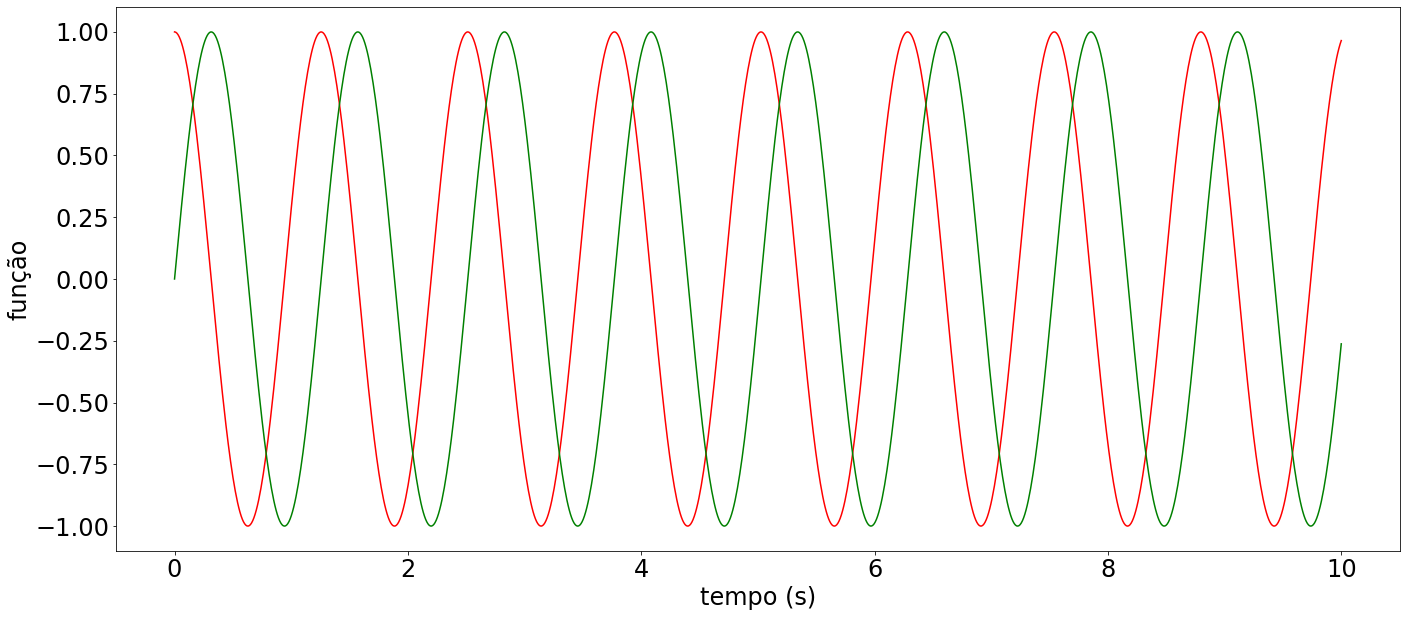

In [ ]:
t = np.linspace(0, 10, 1000) #(início, fim, número_de_elementos)

f1 = np.cos(5*t) 
f2 = np.sin(5*t)

plt.plot(t,f1, 'r')
plt.plot(t,f2,'g')

plt.xlabel('tempo (s)')
plt.ylabel('função')
plt.show()

# Resolução do Roteiro 

## Questão 2

**Façam a expansão por frações parciais das seguintes funções de transferência:**

### item a

$$F(s)=\frac{s+3}{s^2+7s+10}$$

In [ ]:
numf = np.array([1, 3])
denf = np.array([1, 7, 10])

[K,p,k]=scipy.signal.residue(numf,denf)

print('Resíduos = ',K)
print('Denominadores = ',p)
print('Termos direto = ',k)

Resíduos =  [0.333 0.667]
Denominadores =  [-2. -5.]
Termos direto =  []


Dessa forma,
$$F(s)=\frac{s+3}{s^2+7s+10}= \frac{0,333}{(s+2)}+\frac{0,667}{(s+5)}$$

### item b

$$F(s)=\frac{s(s+4)}{s^2+4s+4}$$

In [ ]:
numf = np.array([1,3,0])
denf = np.array([1,4,4])

[K,p,k]=scipy.signal.residue(numf,denf)

print('Denominadores = ',p)
print('Resíduos = ',K)
print('Termos direto = ',k)

Denominadores =  [-2. -2.]
Resíduos =  [-1. -2.]
Termos direto =  [1.]


Então,

$$F(s)=\frac{s(s+3)}{s^2+4s+4}= \frac{-1}{(s+2)}+\frac{-2}{(s+2)^2}+1$$

### item c

$$F(s)=\frac{s^3+2s^2+4s+1}{(s^2+1)(s^2+5s+3)}$$

In [ ]:
numf = np.array([1,2,4,1])
denf = np.convolve([1, 0, 1],[1, 5, 3])

[K,p,k]=scipy.signal.residue(numf,denf)

print('Denominadores = ',p)
print('Resíduos = ',K)
print('Termos direto = ',k)

Denominadores =  [-6.972e-01+0.j  1.110e-16+1.j  1.110e-16-1.j -4.303e+00+0.j]
Resíduos =  [-0.216+0.j     0.19 -0.224j  0.19 +0.224j  0.836-0.j   ]
Termos direto =  []


## Questão 3

**Considere um sistema dinâmico linear descrito pela seguinte equação diferencial ordinária:**

$$ \frac{d^2y(t)}{dt}+2\frac{dy(t)}{dt}+5y(t)=x(t) $$

### item a

**Assumindo condições iniciais nulas, obtenha a função de transferência $H(s)=Y(s)/X(s)$.**

In [ ]:
numf = 1
denf = [1,2,5]

FT = co.tf(numf,denf)
print(FT)


      1
-------------
s^2 + 2 s + 5



control.xferfcn.TransferFunction

### item b

**Faça a expansão por frações parciais da função de transferência**

In [ ]:
[K,p,k]=scipy.signal.residue(numf,denf)

print('Denominadores = ',p)
print('Resíduos = ',K)
print('Termos direto = ',k)

Denominadores =  [-1.+2.j -1.-2.j]
Resíduos =  [0.-0.25j 0.+0.25j]
Termos direto =  []


### item c

**Calcule a Transformada Inversa de Laplace e verifique seu resultado computacionalmente (Dica: utilize a função sympy.inverse_laplace_transform)**

$$F(s)=\frac{1}{s^2+2s+5}$$

---

$$\mathcal{L}^{-1}(\frac{1}{s^2+2s+5})= \mathcal{L}^{-1}(\frac{1}{(s+1)^2+5})$$

---

Se $\mathcal{L}^{-1}(F(s))=f(t)$, então: $$\mathcal{L}^{-1}(F(s-a))=e^{at}f(t)$$

---

Para $\frac{1}{(s+1)^2+4}:a=-1$, $$F(s)=\frac{1}{s^2+4}=e^{-t}\mathcal{L}^{-1}(\frac{1}{s^2+4})$$

---

Como $\mathcal{L}^{-1}(\frac{1}{s^2+4})= \frac{1}{2}sin(2t)$, então:



$$F(s)=\frac{1}{s^2+2s+5}=e^{-t}\frac{1}{2}sin(2t)$$

In [ ]:
def invL(F):
    return sp.inverse_laplace_transform(F, s, t)

FT = 1/((s**2) + (2*s) + 5)
invL(F)


exp(-a*t)*Heaviside(t)

## Questão 4
**(Teórica) Obtenha a equação diferencial ordinária, a transformada de Laplace e a função de transferência do sistema abaixo considerando a saída como a tensão sobre o indutor**

![Circuito.png](https://drive.google.com/uc?id=1tv6U6tm8aD6dsVbsyAj14zv5E5EKyOxB)

Passando o circuito para o dominio de $s$, temos a seguinte equação para a tensão no indutor:
$$v_{L}(s)=\frac{Ls}{R+Ls+\frac{1}{sC}}\cdot v(s)$$

---

$$v_L(s)=\frac{LCs^2}{RsC+Ls^2+1}\cdot v(s)$$

---

$$\frac{v_L(s)}{v(s)}=\frac{LC}{\frac{1}{s^2}+\frac{RC}{s}+LC}$$

